# Simple Linear Regression (OLS)

## What is Simple Linear Regression?
Simple Linear Regression is a basic statistical method used to understand the relationship between two variables — one **independent variable (X)** and one **dependent variable (Y)**.  
It fits a straight line (regression line) to the data, represented by the equation:

**y = b0 + b1 * x**

where  
- **b0** = intercept (value of y when x = 0)  
- **b1** = slope (rate of change in y for each unit change in x)

The coefficients (b0 and b1) are calculated using the **Ordinary Least Squares (OLS)** method, which minimizes the sum of squared errors between actual and predicted values.

---

## Why is it Used?
- To **predict** one variable based on another (e.g., predicting salary from years of experience).  
- To **understand relationships** between variables.  
- To **analyze trends** and make data-driven decisions.  
- To serve as a **foundation** for more advanced regression techniques like Multiple Regression, Ridge, and Lasso.

---


## How to Find b0 and b1 (OLS Method)

The goal of the **Ordinary Least Squares (OLS)** method is to minimize the total squared difference between the actual and predicted values of y.

We find the slope (**b1**) and intercept (**b0**) using the following formulas:

**Slope (b1):**  
b1 = Σ(xᵢ - x̄)(yᵢ - ȳ) / Σ(xᵢ - x̄)²  

**Intercept (b0):**  
b0 = ȳ - b1 × x̄  

where:  
- x̄ = mean of X values  
- ȳ = mean of Y values  

Once b0 and b1 are calculated, the regression line can be used to **predict new Y values** for given X inputs.

---

## Example (Conceptually)
If you have data of **Years of Experience (X)** and **Salary (Y)**,  
Simple Linear Regression helps to predict the salary for any given experience level.  

By calculating **b0** and **b1** from your data, you get an equation like:

**Salary = 25000 + 8000 × (Years of Experience)**

This means:
- Base salary (when experience = 0) is ₹25,000  
- For every additional year of experience, salary increases by ₹8,000.

---

## Summary
- Simple Linear Regression finds a straight line that best fits your data.  
- It helps in prediction and understanding relationships between variables.  
- Coefficients b0 and b1 are found using **OLS (Ordinary Least Squares)** formulas.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [115]:
data = pd.read_csv('Experience-Salary.csv')

In [116]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [117]:
data.shape

(1000, 2)

In [118]:
X = data['exp(in months)'].values
Y = data['salary(in thousands)'].values


In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [120]:
class Linear_Regression:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def fit(self, x_train, y_train):
        
        neumenator = 0
        denumenator = 0
        
        x_mean = x_train.mean()
        y_mean = y_train.mean()
        
        for i in range(x_train.shape[0]):
            neumenator += (x_train[i] - x_mean) * (y_train[i] - y_mean)
            denumenator += (x_train[i] - x_mean) ** 2
            
        self.b1 = neumenator / denumenator
        self.b0 = (y_mean - (self.b1 * x_mean))
    
        print(self.b0)
        print(self.b1)
        
    def predict(self, x_test):
        return x_test * self.b1 + self.b0
    
    

In [121]:
lr = Linear_Regression()
lr.fit(x_train, y_train)

4.911177097709885
0.8336079907057017


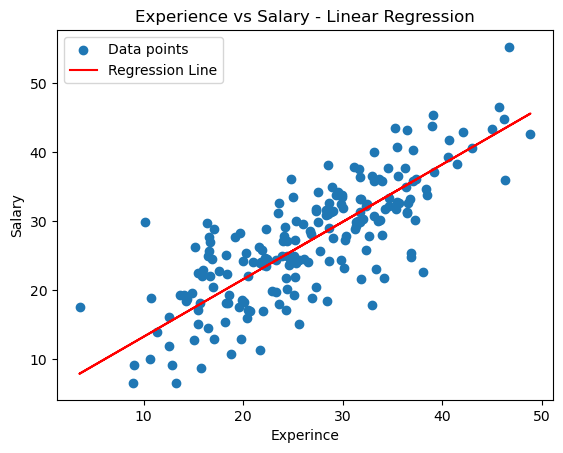

In [153]:
plt.scatter(x_test, y_test, label='Data points')
plt.plot(x_test, lr.predict(x_test), color = 'red', label="Regression Line")
plt.xlabel("Experince")
plt.ylabel("Salary")
plt.title('Experience vs Salary - Linear Regression')
plt.legend()

In [154]:
# Evaluation Metrics
mse = mean_squared_error(y_test, lr.predict(x_test))
rmse = np.sqrt(mse)
print(f"R² Score: {r2_score(y_test, lr.predict(x_test)):.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.621
MSE: 27.650
RMSE: 5.258


## Summary:
- Model type: Simple Linear Regression
- Dataset: Experience vs Salary
- R² Score: 0.621
- Conclusion: Salary increases linearly with experience.
